In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from random import randint
from scipy.stats import norm
import math

def moment(xn, k=1):
    return sum(x ** k for x in xn) / len(xn)

def get_random_indexes(n):
    return (randint(0, n - 1) for _ in range(n))

def make_bootstrap(xn, m):
    res = []
    for _ in range(m):
        res.append([xn[i] for i in get_random_indexes(len(xn))])
    return res

def estimation_OMP(xn):
    return len(xn) / sum(np.log(xi) for xi in xn) + 1


def make_bootstrap_interval_par(xn, m, estimation, betta, name, tetta_est):
    bootstrap = []
    for _ in range(m):
        bootstrap.append(make_selection(tetta_est, len(xn)))
    var_row = []
    for b in bootstrap:
        var_row.append(estimation(b))
    var_row = np.sort(np.array(var_row))
    k1 = math.floor((1 - betta) / 2 * m)
    k2 = math.floor((1 + betta) / 2 * m)
    print(f'''Доверительный интервал (параметрический, bootstrap, {name}): 
                {var_row[k1]} < tetta < {var_row[k2]}''')
    print("Его длина:", var_row[k2] - var_row[k1])
    return var_row[k1], var_row[k2]

def make_bootstrap_interval_not_par(xn, m, tetta_est, estimation, betta, name, bootstrap):
    var_row = []
    for b in bootstrap:
        var_row.append(estimation(b) - tetta_est)
    var_row = np.sort(np.array(var_row))
    k1 = math.floor((1 - betta) / 2 * m)
    k2 = math.floor((1 + betta) / 2 * m)
    print(f'''Доверительный интервал (непараметрический, bootstrap, {name}): 
                {-var_row[k2] + tetta_est} < tetta < {-var_row[k1] + tetta_est}''')
    print("Его длина:", var_row[k2] - var_row[k1])
    return -var_row[k2] + tetta_est, -var_row[k1] + tetta_est

def central_moment(xn, k=2):
    return sum((x - moment(xn, 1)) ** k for x in xn) / len(xn)

def make_selection(tetta, n):
    etta = np.random.uniform(low=0, high=1, size=n)
    xn = [(1 - t) ** (1 / (1 - tetta)) for t in etta]
    return xn
    
def print_characteristics(tetta, n):
    xn = make_selection(tetta, n) 
    print("выборка:", np.sort(np.array(xn)))

    
    betta = 0.95
    tetta_est = estimation_OMP(xn)
    
    apm1 = -1.96 * np.log(2) * 2 ** (1 / (tetta_est - 1)) / (tetta_est - 1) / n ** 0.5 + np.median(xn)
    apm2 = 1.96 * np.log(2) * 2 ** (1 / (tetta_est - 1)) / (tetta_est - 1) / n ** 0.5 + np.median(xn)
    print("асимтотический доверительный интервал для медианы ОМП:", apm1, "< tetta <", apm2)
    print("Его длина:", apm2 - apm1)
    
    ap1 = -1.96 * (tetta_est - 1) / n ** 0.5 + tetta
    ap2 = 1.96 * (tetta_est - 1) / n ** 0.5 + tetta
    print("асимтотический доверительный интервал для tetta ОМП:", ap1, "< tetta <", ap2)
    print("Его длина:", ap2 - ap1)
    
    m = 50000
    bootstrap = make_bootstrap(xn, m)
    OMP_t1, OMP_t2 = make_bootstrap_interval_par(xn, m, estimation_OMP, 0.95, "OMP", tetta_est)
    OMP_Nt1, OMP_Nt2 = make_bootstrap_interval_not_par(xn, m, tetta_est, estimation_OMP, 0.95, "OMP", bootstrap)
    
    plt.grid(True)
    plt.plot((ap1, ap2), (1, 1), label="асимтотический ОМП, tetta")
    plt.plot((apm1, apm2), (0, 0), label="асимтотический ОМП, медиана")
    plt.plot((OMP_t1, OMP_t2), (2, 2), label= "параметрический, bootstrap, ОМП")
    plt.plot((OMP_Nt1, OMP_Nt2), (3, 3), label= "непараметрический, bootstrap, ОМП")
    plt.legend(bbox_to_anchor=(1.07, 1), loc='upper left')
    plt.tight_layout()

выборка: [1.00057233 1.00062134 1.00539701 1.00625145 1.00748835 1.0163908
 1.01942269 1.0309812  1.03206696 1.03228194 1.03462465 1.03594257
 1.03723071 1.04535419 1.04820586 1.05823728 1.06354665 1.08202311
 1.08425764 1.08452464 1.08496219 1.08762168 1.09252725 1.094193
 1.09667952 1.10471909 1.10643704 1.10818183 1.11075264 1.11334954
 1.12223753 1.12488031 1.13261945 1.15208651 1.16680411 1.18020625
 1.1820836  1.18215681 1.18961531 1.19283583 1.20656853 1.20940162
 1.22748584 1.2277207  1.2293172  1.23822628 1.24233496 1.252355
 1.25500522 1.26488553 1.26980763 1.28040938 1.28925032 1.31223675
 1.32990722 1.33398429 1.33739458 1.34385469 1.34423951 1.36041659
 1.40207615 1.40680754 1.46674985 1.47506015 1.49400712 1.49893767
 1.50213641 1.51550805 1.54330737 1.55955121 1.56783752 1.60368867
 1.65859937 1.72209503 1.74101093 1.75139242 1.76355556 1.79633885
 1.8649006  1.86967025 1.8728956  1.88606866 1.90263732 1.90263939
 1.91842676 1.93338864 1.97510976 2.01923905 2.07414888 2.

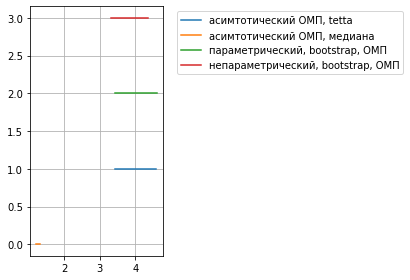

In [2]:
print_characteristics(4, 100)